<a href="https://colab.research.google.com/github/pooyalHsu/20230205python/blob/main/20230304Python%E8%AA%B2%E7%A8%8B-%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90%E5%8F%8A%E7%88%AC%E8%9F%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

許多網站會反爬蟲，所以會抓不到
html(排版語言)是基本架構，css(美工)是優化美化增加設計感基本架構，js就是增加互動

# 20230304筆記

# 抓取網頁原始碼

In [ ]:
import requests

In [ ]:
url = 'https://victorgau.github.io/khpy_web_intro/html_only.html'

In [ ]:
r = requests.get(url)

In [ ]:
r

<Response [200]>

In [ ]:
print(r.text)

<!DOCTYPE html>
<html>
<head>
    <title>HTML範例</title>
</head>
<body>

<h1>哈囉！HTML！</h1>

<img src="ninja.jpg" />

</body>
</html>


## 抓取 Ajax網頁資料

### 從非 ajax 網站的網頁上，可以直接看到資料

In [ ]:
# 典型的html原始碼
url = 'https://victorgau.github.io/khpy_web_intro/spy.html'

In [ ]:
# 透過requests去請求資料然後放到r裡面
r = requests.get(url)

In [ ]:
print(r.text)

<!DOCTYPE html>
<html>
<head>
    <!-- Required meta tags -->
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">

    <!-- Bootstrap CSS -->
    <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/4.0.0/css/bootstrap.min.css" integrity="sha384-Gn5384xqQ1aoWXA+058RXPxPg6fy4IWvTNh0E263XmFcJlSAwiGgFAW/dAiS6JXm" crossorigin="anonymous">
    <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap-icons@1.5.0/font/bootstrap-icons.css">
    <title>HTML範例</title>
</head>
<body>
  <div class="container">
    <h1>SPY股價</h1>
  </div>
    <div class="container">
<table border="1" class="dataframe table table-striped">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Open</th>
      <th>High</th>
      <th>Low</th>
      <th>Close</th>
      <th>Adj Close</th>
      <th>Volume</th>
    </tr>
    <tr>
      <th>Date</th>
      <th></th>
      <th></th>
      <th></th>
      <th></

In [ ]:
import pandas as pd

### 從 ajax 網頁上，可能看不到資料

In [ ]:
# Ajax的網站
url = 'https://victorgau.github.io/khpy_web_intro/spy_ajax.html'

In [ ]:
r = requests.get(url)

In [ ]:
print(r.text)

<!DOCTYPE html>
<html>
<head>
    <!-- Required meta tags -->
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">

    <!-- Bootstrap CSS -->
    <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/4.0.0/css/bootstrap.min.css" integrity="sha384-Gn5384xqQ1aoWXA+058RXPxPg6fy4IWvTNh0E263XmFcJlSAwiGgFAW/dAiS6JXm" crossorigin="anonymous">
    <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap-icons@1.5.0/font/bootstrap-icons.css">
    <script src="https://code.jquery.com/jquery-3.6.0.min.js"></script>
    <title>AJAX範例</title>
</head>
<body>
  <div class="container">
    <h1>SPY股價</h1>
  </div>
  <div class="container">
    <table border="1" class="dataframe table table-striped">
        <thead>
          <tr style="text-align: right;">
            <th></th>
            <th>Open</th>
            <th>High</th>
            <th>Low</th>
            <th>Close</th>
            <th>Adj Close</th>

In [ ]:
url = 'https://victorgau.github.io/khpy_web_intro/spy.json'

In [ ]:
data = requests.get(url).json()

In [ ]:
df = pd.read_json(url)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-26,439.309998,441.029999,439.260010,441.019989,441.019989,43719200
1,2021-07-27,439.910004,439.940002,435.989990,439.010010,439.010010,67397100
2,2021-07-28,439.679993,440.299988,437.309998,438.829987,438.829987,52472400
3,2021-07-29,439.820007,441.799988,439.809998,440.649994,440.649994,47435300
4,2021-07-30,437.910004,440.059998,437.769989,438.510010,438.510010,68890600


## 關於pandas 的 read_html()

In [ ]:
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

In [ ]:
dfs = pd.read_html(url)

In [ ]:
type(dfs)

list

In [ ]:
len(dfs)

2

In [ ]:
dfs[0]

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


回家練習看蝦皮能不能找到搜尋關鍵字

# 剖析網頁原始碼

In [ ]:
s = """<html><head>
    <!-- Required meta tags -->
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">

    <!-- Bootstrap CSS -->
    <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/4.0.0/css/bootstrap.min.css" integrity="sha384-Gn5384xqQ1aoWXA+058RXPxPg6fy4IWvTNh0E263XmFcJlSAwiGgFAW/dAiS6JXm" crossorigin="anonymous">
    <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap-icons@1.5.0/font/bootstrap-icons.css">
    <title>範例索引</title>
</head>
<body>
    <div class="container">
        <div class="row my-5">
            <div class="col">
                <h1 class="bg-warning p-3 rounded">Web及爬蟲簡介課程範例</h1>

                <ul class="list-group">
                    <li class="list-group-item"><i class="bi bi-globe"></i> <a href="html_only.html">HTML 範例</a></li>
                    <li class="list-group-item"><i class="bi bi-globe"></i> <a href="html_css.html">HTML + CSS 範例</a></li>
                    <li class="list-group-item"><i class="bi bi-globe"></i> <a href="html_css_javascript.html">HTML + CSS + Javascript 範例</a></li>
                    <li class="list-group-item"><i class="bi bi-bug"></i> <a href="example01.html">example01.html (爬蟲抓取用範例)</a></li>
                    <li class="list-group-item"><i class="bi bi-bug"></i> <a href="example02.html">example02.html (爬蟲抓取用範例)</a></li>
                    <li class="list-group-item"><i class="bi bi-bug"></i> <a href="example03.html">example03.html (爬蟲抓取用範例)</a></li>
                    <li class="list-group-item"><i class="bi bi-bug"></i> <a href="example04.html">example04.html (爬蟲抓取用範例)</a></li>
                    <li class="list-group-item"><i class="bi bi-bug"></i> <a href="example05.html">example05.html (爬蟲抓取用範例)</a></li>
                    <li class="list-group-item"><i class="bi bi-bug"></i> <a href="spy.html">Classic HTML 範例 (爬蟲抓取用範例)</a></li>
                    <li class="list-group-item"><i class="bi bi-bug"></i> <a href="spy_ajax.html">Ajax 範例 (爬蟲抓取用範例)</a></li>
                    <li class="list-group-item"><i class="bi bi-bug"></i> <a href="form_get.html">HTTP GET 方法說明</a></li>
                    <li class="list-group-item"><i class="bi bi-bug"></i> <a href="form_post.html">HTTP POST 方法說明</a></li>
                </ul>         
            </div>
    
        </div>
    </div>

<!-- Optional JavaScript -->
<!-- jQuery first, then Popper.js, then Bootstrap JS -->
<script src="https://code.jquery.com/jquery-3.2.1.slim.min.js" integrity="sha384-KJ3o2DKtIkvYIK3UENzmM7KCkRr/rE9/Qpg6aAZGJwFDMVNA/GpGFF93hXpG5KkN" crossorigin="anonymous"></script>
<script src="https://cdnjs.cloudflare.com/ajax/libs/popper.js/1.12.9/umd/popper.min.js" integrity="sha384-ApNbgh9B+Y1QKtv3Rn7W3mgPxhU9K/ScQsAP7hUibX39j7fakFPskvXusvfa0b4Q" crossorigin="anonymous"></script>
<script src="https://maxcdn.bootstrapcdn.com/bootstrap/4.0.0/js/bootstrap.min.js" integrity="sha384-JZR6Spejh4U02d8jOt6vLEHfe/JQGiRRSQQxSfFWpi1MquVdAyjUar5+76PVCmYl" crossorigin="anonymous"></script>


</body></html>"""

In [ ]:
type(s)

str

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
soup = BeautifulSoup(s)

In [ ]:
soup.h1

<h1 class="bg-warning p-3 rounded">Web及爬蟲簡介課程範例</h1>

In [ ]:
soup.h1.text

'Web及爬蟲簡介課程範例'

In [ ]:
soup.li

<li class="list-group-item"><i class="bi bi-globe"></i> <a href="html_only.html">HTML 範例</a></li>

In [ ]:
soup.select("li")

[<li class="list-group-item"><i class="bi bi-globe"></i> <a href="html_only.html">HTML 範例</a></li>,
 <li class="list-group-item"><i class="bi bi-globe"></i> <a href="html_css.html">HTML + CSS 範例</a></li>,
 <li class="list-group-item"><i class="bi bi-globe"></i> <a href="html_css_javascript.html">HTML + CSS + Javascript 範例</a></li>,
 <li class="list-group-item"><i class="bi bi-bug"></i> <a href="example01.html">example01.html (爬蟲抓取用範例)</a></li>,
 <li class="list-group-item"><i class="bi bi-bug"></i> <a href="example02.html">example02.html (爬蟲抓取用範例)</a></li>,
 <li class="list-group-item"><i class="bi bi-bug"></i> <a href="example03.html">example03.html (爬蟲抓取用範例)</a></li>,
 <li class="list-group-item"><i class="bi bi-bug"></i> <a href="example04.html">example04.html (爬蟲抓取用範例)</a></li>,
 <li class="list-group-item"><i class="bi bi-bug"></i> <a href="example05.html">example05.html (爬蟲抓取用範例)</a></li>,
 <li class="list-group-item"><i class="bi bi-bug"></i> <a href="spy.html">Classic HTML 範例 (

In [ ]:
soup.select("li")[0]

<li class="list-group-item"><i class="bi bi-globe"></i> <a href="html_only.html">HTML 範例</a></li>

In [ ]:
soup.select("li")[0].text

' HTML 範例'

In [ ]:
for x in soup.select("li"):
  print(x.text)

 HTML 範例
 HTML + CSS 範例
 HTML + CSS + Javascript 範例
 example01.html (爬蟲抓取用範例)
 example02.html (爬蟲抓取用範例)
 example03.html (爬蟲抓取用範例)
 example04.html (爬蟲抓取用範例)
 example05.html (爬蟲抓取用範例)
 Classic HTML 範例 (爬蟲抓取用範例)
 Ajax 範例 (爬蟲抓取用範例)
 HTTP GET 方法說明
 HTTP POST 方法說明


In [ ]:
for i, x in enumerate(soup.select("li")):
  print(i,":",x.text)

0 :  HTML 範例
1 :  HTML + CSS 範例
2 :  HTML + CSS + Javascript 範例
3 :  example01.html (爬蟲抓取用範例)
4 :  example02.html (爬蟲抓取用範例)
5 :  example03.html (爬蟲抓取用範例)
6 :  example04.html (爬蟲抓取用範例)
7 :  example05.html (爬蟲抓取用範例)
8 :  Classic HTML 範例 (爬蟲抓取用範例)
9 :  Ajax 範例 (爬蟲抓取用範例)
10 :  HTTP GET 方法說明
11 :  HTTP POST 方法說明


In [ ]:
for i, x in enumerate(soup.select("li")):
  print(f"{i:2}", ":", x.text)

 0 :  HTML 範例
 1 :  HTML + CSS 範例
 2 :  HTML + CSS + Javascript 範例
 3 :  example01.html (爬蟲抓取用範例)
 4 :  example02.html (爬蟲抓取用範例)
 5 :  example03.html (爬蟲抓取用範例)
 6 :  example04.html (爬蟲抓取用範例)
 7 :  example05.html (爬蟲抓取用範例)
 8 :  Classic HTML 範例 (爬蟲抓取用範例)
 9 :  Ajax 範例 (爬蟲抓取用範例)
10 :  HTTP GET 方法說明
11 :  HTTP POST 方法說明


In [ ]:
for i, x in enumerate(soup.select("li")):
  print(f"{i:2}: {x.text}")

 0:  HTML 範例
 1:  HTML + CSS 範例
 2:  HTML + CSS + Javascript 範例
 3:  example01.html (爬蟲抓取用範例)
 4:  example02.html (爬蟲抓取用範例)
 5:  example03.html (爬蟲抓取用範例)
 6:  example04.html (爬蟲抓取用範例)
 7:  example05.html (爬蟲抓取用範例)
 8:  Classic HTML 範例 (爬蟲抓取用範例)
 9:  Ajax 範例 (爬蟲抓取用範例)
10:  HTTP GET 方法說明
11:  HTTP POST 方法說明


# 關於字串格式化
可以整理抓出來的資料的整齊度

In [ ]:
x = 1
y = 1.23
z = True
w = "dog"

In [ ]:
print(x,y,z,w)

1 1.23 True dog


In [ ]:
#在後面引號輸入想要分隔的符號，預設值是逗點
print(x,y,z,w,sep="")

11.23Truedog


### f-string (3.5版後才有的)

In [ ]:
print(f"{x},{y},{z},{w}")

1,1.23,True,dog


In [ ]:
print("{x},{y},{z},{w}")

{x},{y},{z},{w}


In [ ]:
# f值可以加上:做變化型
print(f"{x},{y},{z},{w}")
print(f"{x:5},{y},{z},{w}")
print(f"{x:05},{y},{z},{w}")

1,1.23,True,dog
    1,1.23,True,dog
00001,1.23,True,dog


In [ ]:
print(f"{x},{y},{z},{w}")
print(f"{x},{y:7.5f},{z},{w}")
#浮點數總共顯示7個字元，點2是小數點後面取幾位
print(f"{x},{y:7.2f},{z},{w}")
print(f"{x},{y:7.2},{z},{w}")
print(f"{x},{y:7.3f},{z},{w}")
print(f"{x},{y:7.3},{z},{w}")
print(f"{x},{y:07.2f},{z},{w}")

1,1.23,True,dog
1,1.23000,True,dog
1,   1.23,True,dog
1,    1.2,True,dog
1,  1.230,True,dog
1,   1.23,True,dog
1,0001.23,True,dog


In [ ]:
print(f"{x},{y},{z},{w}")
print(f"{x},{y},{z},{w:10}")
print(f"{x},{y},{z},{w:>10}")

1,1.23,True,dog
1,1.23,True,dog       
1,1.23,True,       dog


### string.format

In [ ]:
print("{},{},{},{}".format(x,y,z,w))

1,1.23,True,dog


In [ ]:
print("{0},{1},{2},{1}".format(x,y,z,w))

1,1.23,True,1.23


In [ ]:
print("{a},{b},{c},{d}".format(a=x,b=y,c=z,d=w))

1,1.23,True,dog


練習

In [ ]:
u = 3.1415926

In [ ]:
print(f"{u:7.2f}")

   3.14


練習
https://stackoverflow.com/questions/53908134/what-is-20-format-string-meaning-in-python

In [ ]:
popularity = [["Language", 2017, 2012, 2007, 2002, 1997, 1992, 1987], 
          ["Java", 1, 2, 1, 1, 15, 0, 0],
          ["C", 2, 1, 2, 2, 1, 1, 1],
          ["C++", 3, 3, 3, 3, 2, 2, 5],
          ["C#", 4, 4, 7, 13, 0, 0, 0],
          ["Python", 5, 7, 6, 11, 27, 0, 0],
          ["Visual Basic .NET", 6, 17, 0, 0, 0, 0, 0],
          ["PHP", 7, 6, 4, 5, 0, 0, 0],
          ["JavaScript", 8, 9, 8, 7, 23, 0, 0],
          ["Perl", 9, 8, 5, 4, 4, 10, 0]]

format_string = "{:<20}  {:>4}  {:>4}  {:>4}  {:>4}  {:>4}  {:>4}  {:>4}"

In [ ]:
for i in popularity:
  print(format_string.format(i[0], i[1], i[2], i[3], i[4], i[5], i[6], i[7]))

Language              2017  2012  2007  2002  1997  1992  1987
Java                     1     2     1     1    15     0     0
C                        2     1     2     2     1     1     1
C++                      3     3     3     3     2     2     5
C#                       4     4     7    13     0     0     0
Python                   5     7     6    11    27     0     0
Visual Basic .NET        6    17     0     0     0     0     0
PHP                      7     6     4     5     0     0     0
JavaScript               8     9     8     7    23     0     0
Perl                     9     8     5     4     4    10     0


In [ ]:
# 使用 * unpack list
for i in popularity:
  print(format_string.format(*i))

Language              2017  2012  2007  2002  1997  1992  1987
Java                     1     2     1     1    15     0     0
C                        2     1     2     2     1     1     1
C++                      3     3     3     3     2     2     5
C#                       4     4     7    13     0     0     0
Python                   5     7     6    11    27     0     0
Visual Basic .NET        6    17     0     0     0     0     0
PHP                      7     6     4     5     0     0     0
JavaScript               8     9     8     7    23     0     0
Perl                     9     8     5     4     4    10     0


## 使用 css selector 來剖析資料
https://www.w3schools.com/cssref/css_selectors.php

https://developer.mozilla.org/zh-TW/docs/Web/CSS/CSS_Selectors

html中看到style就是css用來美化html的語法

In [ ]:
url = 'https://victorgau.github.io/khpy_web_intro/'

In [ ]:
r = requests.get(url)

In [ ]:
soup = BeautifulSoup(r.text)

In [ ]:
soup.select("li")

[<li class="list-group-item"><i class="bi bi-globe"></i> <a href="html_only.html">HTML 範例</a></li>,
 <li class="list-group-item"><i class="bi bi-globe"></i> <a href="html_css.html">HTML + CSS 範例</a></li>,
 <li class="list-group-item"><i class="bi bi-globe"></i> <a href="html_css_javascript.html">HTML + CSS + Javascript 範例</a></li>,
 <li class="list-group-item"><i class="bi bi-bug"></i> <a href="example01.html">example01.html (爬蟲抓取用範例)</a></li>,
 <li class="list-group-item"><i class="bi bi-bug"></i> <a href="example02.html">example02.html (爬蟲抓取用範例)</a></li>,
 <li class="list-group-item"><i class="bi bi-bug"></i> <a href="example03.html">example03.html (爬蟲抓取用範例)</a></li>,
 <li class="list-group-item"><i class="bi bi-bug"></i> <a href="example04.html">example04.html (爬蟲抓取用範例)</a></li>,
 <li class="list-group-item"><i class="bi bi-bug"></i> <a href="example05.html">example05.html (爬蟲抓取用範例)</a></li>,
 <li class="list-group-item"><i class="bi bi-bug"></i> <a href="spy.html">Classic HTML 範例 (

## 抓取露天拍賣資料

In [ ]:
url = 'https://www.ruten.com.tw/category/0011'

In [ ]:
headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36'}

In [ ]:
r = requests.get(url,headers=headers)

In [ ]:
'凸頭' in r.text

False

In [ ]:
url = "https://rapi.ruten.com.tw/api/items/v2/list?gno=21203073884581,21203073855084,22243606777400,22244608865692,22302937500980,22306987134735,22308073518043,22134699516389,22238403273488,21945822081428,22115680698839&level=detail"

In [ ]:
data = requests.get(url, headers=headers).json()

In [ ]:
type(data)

dict

In [ ]:
data.keys()

dict_keys(['status', 'data'])

In [ ]:
type(data['data'])

list

In [ ]:
data['data'][0].keys()

dict_keys(['id', 'class', 'name', 'num', 'images', 'currency', 'goods_price', 'goods_ori_price', 'goods_price_range', 'watch_num', 'sold_num', 'buyer_limit_num', 'stock_status', 'pre_order_ship_date', 'fast_ship', 'free_shipping', 'youtube_link', 'video_link', 'ncc_check_code', 'bsmi_code', 'goods_no', 'available', 'post_time', 'spec_type', 'deliver_way', 'mode', 'ship', 'platform', 'ctrl_rowid', 'user', 'user_credit', 'pay_way', 'title_style', 'selling_g_now_price', 'item_remaining_time', 'translation_type', 'translated_name', 'min_estimated_delivery_date', 'max_estimated_delivery_date', 'update_time', 'is_brand_seller', 'is_goods_from_oversea', 'location', 'condition', 'codition', 'accept_shiprule', 'user_class', 'close_no', 'description_url', 'spec_info', 'text2'])

In [ ]:
len(data['data'])

11

In [ ]:
for i in data['data']:
  print(f"{i['name']} ==> {i['goods_price_range']}")

凸頭 18650電池 可開發票 尖頭 鋰電池 充電電池 3000mAh 3.7v 高容量 手電筒 電風扇 Li-ion ==> {'min': 8, 'max': 24, 'ori_min': 8, 'ori_max': 24}
18650充電電池 高容量 4000mAh 電池 鋰電池 充電電池 3.7V Li-ion 尖頭 凸頭 充電器 USB ==> {'min': 39, 'max': 119, 'ori_min': 39, 'ori_max': 119}
三菱電機HC-BH023-S12   99新 ==> {'min': 39000, 'max': 40950, 'ori_min': 39000, 'ori_max': 40950}
【秀秀】三菱PLC模塊 QJ72LP25-25 全新 ==> {'min': 33000, 'max': 33000, 'ori_min': 33000, 'ori_max': 33000}
(辦公首選華碩I7商務桌機 獨家送微軟OFFICE)I7-11700時脈4.9G/16核心/16G/256G+1TB電腦 ==> {'min': 25900, 'max': 29900, 'ori_min': 25900, 'ori_max': 29900}
WD西部數據NAS硬盤12T服務器硬盤12t網絡硬盤紅盤Pro WD121KFBX ==> {'min': 50760, 'max': 50760, 'ori_min': 50760, 'ori_max': 50760}
全新零刻 SEi8 i5-8279U 酷睿i5辦公電腦微型主機 Intel 辦公電腦 迷你電腦 小電腦 微電腦 ==> {'min': 23692, 'max': 23692, 'ori_min': 23692, 'ori_max': 23692}
【樂意創客官方店】《附發票》AI機械手臂 樹莓派 4B Raspberry 視覺識別 ArmPi-FPV (豪華版本) ==> {'min': 22800, 'max': 22800, 'ori_min': 22800, 'ori_max': 22800}
KINGHOPE KH-82膽機組合音響發燒hifi藍牙書架音箱功放CD/DVD套裝 ==> {'min': 38280, 'max': 38280, 'ori_mi

測試蝦皮

In [ ]:
url = 'https://shopee.tw/search?keyword=%E7%8E%A9%E5%85%B7'

In [ ]:
r = requests.get(url,headers=headers)

抓標案

In [ ]:
url = "https://web.pcc.gov.tw/prkms/tender/common/bulletion/readBulletion?querySentence=%E9%9B%BB%E8%85%A6&tenderStatusType=%E6%8B%9B%E6%A8%99&sortCol=TENDER_NOTICE_DATE&timeRange=112&pageSize=10"

In [ ]:
dfs = pd.read_html(url,encoding='utf-8')

In [ ]:
dfs[4]['標案案號標案名稱'][0]

'11211  var hw = Geps3.CNS.pageCode2Img("容積代金基金採購私有公共設施保留地線上投標系統案");$("#1").html(hw);'

## 讀取政府資料開放平台時價登錄資料

e.g:

https://data.kcg.gov.tw/dataset/d7bfc353-1617-42d8-a0e3-3cd2d99edb10/resource/20387f3d-6970-40a4-86f0-a5c33546e75d/download/111q2.csv

In [ ]:
url = "	https://data.kcg.gov.tw/dataset/d7bfc353-1617-42d8-a0e3-3cd2d99edb10/resource/20387f3d-6970-40a4-86f0-a5c33546e75d/download/111q2.csv"

In [ ]:
df = pd.read_csv(url)

URLError: ignored

In [ ]:
df.head()

### 將 DataFrame 轉存成不同格式

In [ ]:
df.to_excel('實價登錄資料.xlsx')

In [ ]:
df.head(100).to_html('實價登錄前一百筆資料.html')

In [ ]:
df.head(100).to_json('實價登錄前一百筆資料.json')

## 檔案的IO

### 文字檔

一般作法：

```python
f = open('test.txt', 'w')
f.write(data)
f.close()
```

替代性作法：
```python
with open('test.txt', 'w') as f:
  f.write(data)
```

### 二進位擋(Binary Files)
譬如：圖片, excel檔等

一般作法：

```python
f = open('test.jpg', 'wb')
f.write(data)
f.close()
```

替代性作法：
```python
with open('test.jpg', 'wb') as f:
  f.write(data)
```

### 抓取網頁原始碼並存成文字檔

In [ ]:
url = 'https://victorgau.github.io/khpy_web_intro/html_only.html'

In [ ]:
r = requests.get(url)

In [ ]:
with open('index.html','w') as f:
  f.write(r.text)

### 抓取圖片並存成圖片檔

In [ ]:
url = 'https://victorgau.github.io/khpy_web_intro/ninja.jpg'

In [ ]:
r = requests.get(url)

In [ ]:
with open('ninja.jpg','wb') as f:
  f.write(r.content)

# 練習 Pandas 的使用

In [2]:
import numpy as np
import pandas as pd

In [3]:
#grades = np.random.randint(低分, 高分, (人數, 4維陣列))
grades = np.random.randint(30, 101, (10, 4))

In [4]:
grades

array([[58, 52, 48, 82],
       [88, 50, 37, 76],
       [60, 63, 86, 42],
       [70, 37, 69, 83],
       [74, 98, 78, 92],
       [35, 67, 70, 44],
       [91, 63, 75, 48],
       [40, 32, 35, 42],
       [33, 60, 37, 89],
       [75, 48, 57, 36]])

In [5]:
df = pd.DataFrame(grades)

In [6]:
df

,0,1,2,3
0,58,52,48,82
1,88,50,37,76
2,60,63,86,42
3,70,37,69,83
4,74,98,78,92
5,35,67,70,44
6,91,63,75,48
7,40,32,35,42
8,33,60,37,89
9,75,48,57,36


In [7]:
df.columns = ['國文','英文','數學','理化']

In [8]:
df

,國文,英文,數學,理化
0,58,52,48,82
1,88,50,37,76
2,60,63,86,42
3,70,37,69,83
4,74,98,78,92
5,35,67,70,44
6,91,63,75,48
7,40,32,35,42
8,33,60,37,89
9,75,48,57,36


In [9]:
df.index = ['郭雅惠','陳欣虹','王曉明','李四','陳恭','小孩子','孩子王','張先生','張大名','張哈哈']

In [10]:
df

,國文,英文,數學,理化
郭雅惠,58,52,48,82
陳欣虹,88,50,37,76
王曉明,60,63,86,42
李四,70,37,69,83
陳恭,74,98,78,92
小孩子,35,67,70,44
孩子王,91,63,75,48
張先生,40,32,35,42
張大名,33,60,37,89
張哈哈,75,48,57,36


## 列出國文不及格的同學

In [11]:
#取出國文成績
df['國文']

郭雅惠    58
陳欣虹    88
王曉明    60
李四     70
陳恭     74
小孩子    35
孩子王    91
張先生    40
張大名    33
張哈哈    75
Name: 國文, dtype: int64

In [12]:
#判斷成績是否及格：True:不及格 False:及格
df['國文']<60

郭雅惠     True
陳欣虹    False
王曉明    False
李四     False
陳恭     False
小孩子     True
孩子王    False
張先生     True
張大名     True
張哈哈    False
Name: 國文, dtype: bool

In [13]:
df[df['國文'] < 60]

,國文,英文,數學,理化
郭雅惠,58,52,48,82
小孩子,35,67,70,44
張先生,40,32,35,42
張大名,33,60,37,89


## 列出國文、英文不及格的同學名單

In [14]:
df['英文']<60

郭雅惠     True
陳欣虹     True
王曉明    False
李四      True
陳恭     False
小孩子    False
孩子王    False
張先生     True
張大名    False
張哈哈     True
Name: 英文, dtype: bool

In [15]:
#使用&(and)連結兩個條件，(註：｜(or))
df[(df['國文'] < 60) & (df['英文'] < 60)]

,國文,英文,數學,理化
郭雅惠,58,52,48,82
張先生,40,32,35,42


## 計算總分及平均

In [16]:
df.sum(axis=1)

郭雅惠    240
陳欣虹    251
王曉明    251
李四     259
陳恭     342
小孩子    216
孩子王    277
張先生    149
張大名    219
張哈哈    216
dtype: int64

In [17]:
df['總分'] = df.sum(axis=1)

In [18]:
df

,國文,英文,數學,理化,總分
郭雅惠,58,52,48,82,240
陳欣虹,88,50,37,76,251
王曉明,60,63,86,42,251
李四,70,37,69,83,259
陳恭,74,98,78,92,342
小孩子,35,67,70,44,216
孩子王,91,63,75,48,277
張先生,40,32,35,42,149
張大名,33,60,37,89,219
張哈哈,75,48,57,36,216


In [19]:
df.mean ()

國文     62.4
英文     57.0
數學     59.2
理化     63.4
總分    242.0
dtype: float64

In [20]:
df.mean(axis=1)

郭雅惠     96.0
陳欣虹    100.4
王曉明    100.4
李四     103.6
陳恭     136.8
小孩子     86.4
孩子王    110.8
張先生     59.6
張大名     87.6
張哈哈     86.4
dtype: float64

In [21]:
df[['國文','英文','數學','理化']].mean(axis=1)

郭雅惠    60.00
陳欣虹    62.75
王曉明    62.75
李四     64.75
陳恭     85.50
小孩子    54.00
孩子王    69.25
張先生    37.25
張大名    54.75
張哈哈    54.00
dtype: float64

In [22]:
df['平均'] = df[['國文','英文','數學','理化']].mean(axis=1)

In [23]:
df

,國文,英文,數學,理化,總分,平均
郭雅惠,58,52,48,82,240,60.00
陳欣虹,88,50,37,76,251,62.75
王曉明,60,63,86,42,251,62.75
李四,70,37,69,83,259,64.75
陳恭,74,98,78,92,342,85.50
小孩子,35,67,70,44,216,54.00
孩子王,91,63,75,48,277,69.25
張先生,40,32,35,42,149,37.25
張大名,33,60,37,89,219,54.75
張哈哈,75,48,57,36,216,54.00


## 輸出成excel檔

In [24]:
df.to_excel('成績.xlsx')

## 找出名次

In [25]:
df.rank()

,國文,英文,數學,理化,總分,平均
郭雅惠,4.0,5.0,4.0,7.0,5.0,5.0
陳欣虹,9.0,4.0,2.5,6.0,6.5,6.5
王曉明,5.0,7.5,10.0,2.5,6.5,6.5
李四,6.0,2.0,6.0,8.0,8.0,8.0
陳恭,7.0,10.0,9.0,10.0,10.0,10.0
小孩子,2.0,9.0,7.0,4.0,2.5,2.5
孩子王,10.0,7.5,8.0,5.0,9.0,9.0
張先生,3.0,1.0,1.0,2.5,1.0,1.0
張大名,1.0,6.0,2.5,9.0,4.0,4.0
張哈哈,8.0,3.0,5.0,1.0,2.5,2.5


In [26]:
df['總分'].rank(ascending=False)

郭雅惠     6.0
陳欣虹     4.5
王曉明     4.5
李四      3.0
陳恭      1.0
小孩子     8.5
孩子王     2.0
張先生    10.0
張大名     7.0
張哈哈     8.5
Name: 總分, dtype: float64

In [27]:
df['名次'] = df['總分'].rank(ascending=False)

In [28]:
df

,國文,英文,數學,理化,總分,平均,名次
郭雅惠,58,52,48,82,240,60.00,6.0
陳欣虹,88,50,37,76,251,62.75,4.5
王曉明,60,63,86,42,251,62.75,4.5
李四,70,37,69,83,259,64.75,3.0
陳恭,74,98,78,92,342,85.50,1.0
小孩子,35,67,70,44,216,54.00,8.5
孩子王,91,63,75,48,277,69.25,2.0
張先生,40,32,35,42,149,37.25,10.0
張大名,33,60,37,89,219,54.75,7.0
張哈哈,75,48,57,36,216,54.00,8.5


In [29]:
df['國文']

郭雅惠    58
陳欣虹    88
王曉明    60
李四     70
陳恭     74
小孩子    35
孩子王    91
張先生    40
張大名    33
張哈哈    75
Name: 國文, dtype: int64

In [30]:
type(df['國文'])

pandas.core.series.Series

## 讀取特定欄位

### 讀取所有人的國文成績 (單一個欄位)

In [35]:
df['國文']

郭雅惠    58
陳欣虹    88
王曉明    60
李四     70
陳恭     74
小孩子    35
孩子王    91
張先生    40
張大名    33
張哈哈    75
Name: 國文, dtype: int64

In [36]:
type(df['國文'])

pandas.core.series.Series

### 同時讀取多個欄位(使用list)(讀取國文及英文成績)

In [37]:
df[['國文','英文']]

,國文,英文
郭雅惠,58,52
陳欣虹,88,50
王曉明,60,63
李四,70,37
陳恭,74,98
小孩子,35,67
孩子王,91,63
張先生,40,32
張大名,33,60
張哈哈,75,48


In [38]:
df[['國文']]

,國文
郭雅惠,58
陳欣虹,88
王曉明,60
李四,70
陳恭,74
小孩子,35
孩子王,91
張先生,40
張大名,33
張哈哈,75


In [39]:
type(df[['國文']])

pandas.core.frame.DataFrame

### 使用 .loc()及.iloc()

In [40]:
#這個可以透過標籤尋找
df.loc['郭雅惠']

國文     58.0
英文     52.0
數學     48.0
理化     82.0
總分    240.0
平均     60.0
名次      6.0
Name: 郭雅惠, dtype: float64

In [43]:
#這個是使用位置尋找行
df.iloc[0]

國文     58.0
英文     52.0
數學     48.0
理化     82.0
總分    240.0
平均     60.0
名次      6.0
Name: 郭雅惠, dtype: float64

In [44]:
df[['國文','英文']].loc['郭雅惠']

國文    58
英文    52
Name: 郭雅惠, dtype: int64

### 一次讀取多列資料

In [45]:
df.loc['郭雅惠':'孩子王']

,國文,英文,數學,理化,總分,平均,名次
郭雅惠,58,52,48,82,240,60.00,6.0
陳欣虹,88,50,37,76,251,62.75,4.5
王曉明,60,63,86,42,251,62.75,4.5
李四,70,37,69,83,259,64.75,3.0
陳恭,74,98,78,92,342,85.50,1.0
小孩子,35,67,70,44,216,54.00,8.5
孩子王,91,63,75,48,277,69.25,2.0


In [46]:
df.loc[['郭雅惠','孩子王']]

,國文,英文,數學,理化,總分,平均,名次
郭雅惠,58,52,48,82,240,60.00,6.0
孩子王,91,63,75,48,277,69.25,2.0


In [50]:
df[['國文','英文']].loc[['郭雅惠','孩子王']]

,國文,英文
郭雅惠,58,52
孩子王,91,63


In [51]:
df.loc['郭雅惠':'孩子王',['國文','英文']]

,國文,英文
郭雅惠,58,52
陳欣虹,88,50
王曉明,60,63
李四,70,37
陳恭,74,98
小孩子,35,67
孩子王,91,63


## Boolean Indexing / Filtering / Subsetting

### pandas只能對excel做簡單的輸出及更動

### 練習(上市公司基本資料查詢)

In [52]:
url = '	https://mopsfin.twse.com.tw/opendata/t187ap03_L.csv'

In [55]:
stock_df = pd.read_csv(url)

In [59]:
stock_df.head(1)

,出表日期,公司代號,公司名稱,公司簡稱,外國企業註冊地國,產業別,住址,營利事業統一編號,董事長,總經理,...,過戶電話,過戶地址,簽證會計師事務所,簽證會計師1,簽證會計師2,英文簡稱,英文通訊地址,傳真機號碼,電子郵件信箱,網址
0,1120304,1101,臺灣水泥股份有限公司,台泥,－,1,台北市中山北路2段113號,11913502,張安平,程耀輝,...,66365566,台北市重慶南路一段83號5樓,勤業眾信聯合會計師事務所,黃惠敏,郭政弘,TCC,"No.113, Sec.2, Zhongshan N. Rd.,Taipei City 10...",(02)2531-6529,finance@taiwancement.com,http://www.taiwancement.com


In [60]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   出表日期      981 non-null    int64 
 1   公司代號      981 non-null    int64 
 2   公司名稱      981 non-null    object
 3   公司簡稱      981 non-null    object
 4   外國企業註冊地國  981 non-null    object
 5   產業別       981 non-null    int64 
 6   住址        981 non-null    object
 7   營利事業統一編號  981 non-null    int64 
 8   董事長       981 non-null    object
 9   總經理       978 non-null    object
 10  發言人       981 non-null    object
 11  發言人職稱     981 non-null    object
 12  代理發言人     978 non-null    object
 13  總機電話      981 non-null    object
 14  成立日期      981 non-null    int64 
 15  上市日期      981 non-null    int64 
 16  普通股每股面額   981 non-null    object
 17  實收資本額     981 non-null    int64 
 18  私募股數      981 non-null    int64 
 19  特別股       981 non-null    int64 
 20  編制財務報表類型  981 non-null    int64 
 21  股票過戶機構    981 no

In [61]:
stock_df['公司代號'] == 2330

0      False
1      False
2      False
3      False
4      False
       ...  
976    False
977    False
978    False
979    False
980    False
Name: 公司代號, Length: 981, dtype: bool

In [62]:
stock_df[stock_df['公司代號'] == 2330]

,出表日期,公司代號,公司名稱,公司簡稱,外國企業註冊地國,產業別,住址,營利事業統一編號,董事長,總經理,...,過戶電話,過戶地址,簽證會計師事務所,簽證會計師1,簽證會計師2,英文簡稱,英文通訊地址,傳真機號碼,電子郵件信箱,網址
274,1120304,2330,台灣積體電路製造股份有限公司,台積電,－,24,新竹科學園區力行六路8號,22099131,劉德音,總裁: 魏哲家,...,02-6636-5566,台北市重慶南路一段83號5樓,勤業眾信聯合會計師事務所,江美艷,林尚志,TSMC,"No. 8, Li-Hsin Rd. 6, Hsinchu Science Park,Hsi...",03-5797337,invest@tsmc.com,https://www.tsmc.com


In [63]:
stock_df[stock_df['公司代號'] == 2330].iloc[0]

出表日期                                                  1120304
公司代號                                                     2330
公司名稱                                           台灣積體電路製造股份有限公司
公司簡稱                                                      台積電
外國企業註冊地國                                                   － 
產業別                                                        24
住址                                               新竹科學園區力行六路8號
營利事業統一編號                                             22099131
董事長                                                       劉德音
總經理                                                   總裁: 魏哲家
發言人                                                       黃仁昭
發言人職稱                                                副總經理暨財務長
代理發言人                                                     高孟華
總機電話                                               03-5636688
成立日期                                                 19870221
上市日期                                                 19940905
普通股每股面額 

In [67]:
stock_df[stock_df['公司代號'] == 2330].iloc[0]['公司簡稱']

'台積電'

In [70]:
def no2name(stock_no):
  return stock_df[stock_df['公司代號'] == stock_no].iloc[0]['公司簡稱']

In [72]:
#如果股價代號不存在，會出現錯誤
#所以我們使用例外處理，返回錯誤訊息
def no2name(stock_no):
  try:
    return stock_df[stock_df['公司代號'] == stock_no].iloc[0]['公司簡稱']
  except Exception as e:
    return '股票代號不存在'

In [75]:
def no3name(stock_no):
  try:
    return stock_df[stock_df['公司簡稱'] == stock_no].iloc[0]['公司代號']
  except Exception as e:
    return '股票名稱不存在'

In [77]:
no3name('鴻海')

2317

### 關於boolean Indexing

In [78]:
df

,國文,英文,數學,理化,總分,平均,名次
郭雅惠,58,52,48,82,240,60.00,6.0
陳欣虹,88,50,37,76,251,62.75,4.5
王曉明,60,63,86,42,251,62.75,4.5
李四,70,37,69,83,259,64.75,3.0
陳恭,74,98,78,92,342,85.50,1.0
小孩子,35,67,70,44,216,54.00,8.5
孩子王,91,63,75,48,277,69.25,2.0
張先生,40,32,35,42,149,37.25,10.0
張大名,33,60,37,89,219,54.75,7.0
張哈哈,75,48,57,36,216,54.00,8.5


In [79]:
bindex = [True]*5+[False]*5

In [80]:
bindex

[True, True, True, True, True, False, False, False, False, False]

In [81]:
df[bindex]

,國文,英文,數學,理化,總分,平均,名次
郭雅惠,58,52,48,82,240,60.00,6.0
陳欣虹,88,50,37,76,251,62.75,4.5
王曉明,60,63,86,42,251,62.75,4.5
李四,70,37,69,83,259,64.75,3.0
陳恭,74,98,78,92,342,85.50,1.0


In [82]:
import random

In [84]:
random.shuffle(bindex)

In [85]:
bindex

[True, False, False, True, False, True, False, True, True, False]

In [86]:
df[bindex]

,國文,英文,數學,理化,總分,平均,名次
郭雅惠,58,52,48,82,240,60.00,6.0
李四,70,37,69,83,259,64.75,3.0
小孩子,35,67,70,44,216,54.00,8.5
張先生,40,32,35,42,149,37.25,10.0
張大名,33,60,37,89,219,54.75,7.0


## 排序成績資料

### 國文成績從高分到低分做排序

In [110]:
df.sort_values('國文',ascending=False)

,國文,英文,數學,理化,總分,平均,名次
孩子王,91,63,75,48,277,69.25,2.0
陳欣虹,88,50,37,76,251,62.75,4.5
張哈哈,75,48,57,36,216,54.00,8.5
陳恭,74,98,78,92,342,85.50,1.0
李四,70,37,69,83,259,64.75,3.0
王曉明,60,63,86,42,251,62.75,4.5
郭雅惠,58,52,48,82,240,60.00,6.0
張先生,40,32,35,42,149,37.25,10.0
小孩子,35,67,70,44,216,54.00,8.5
張大名,33,60,37,89,219,54.75,7.0


### 國文及英文成績從高分到低分做排序

In [112]:
df.sort_values(['國文','英文'],ascending=False)

,國文,英文,數學,理化,總分,平均,名次
孩子王,91,63,75,48,277,69.25,2.0
陳欣虹,88,50,37,76,251,62.75,4.5
張哈哈,75,48,57,36,216,54.00,8.5
陳恭,74,98,78,92,342,85.50,1.0
李四,70,37,69,83,259,64.75,3.0
王曉明,60,63,86,42,251,62.75,4.5
郭雅惠,58,52,48,82,240,60.00,6.0
張先生,40,32,35,42,149,37.25,10.0
小孩子,35,67,70,44,216,54.00,8.5
張大名,33,60,37,89,219,54.75,7.0


### 國文低至高及英文高至低做排序

In [115]:
df.sort_values(['國文','英文'],ascending=[False,True])

,國文,英文,數學,理化,總分,平均,名次
孩子王,91,63,75,48,277,69.25,2.0
陳欣虹,88,50,37,76,251,62.75,4.5
張哈哈,75,48,57,36,216,54.00,8.5
陳恭,74,98,78,92,342,85.50,1.0
李四,70,37,69,83,259,64.75,3.0
王曉明,60,63,86,42,251,62.75,4.5
郭雅惠,58,52,48,82,240,60.00,6.0
張先生,40,32,35,42,149,37.25,10.0
小孩子,35,67,70,44,216,54.00,8.5
張大名,33,60,37,89,219,54.75,7.0


### 根據加權平均來做排序

In [116]:
df['加權平均'] = df['國文']*0.1+df['英文']*0.3+df['數學']*0.3+df['理化']*0.3

In [117]:
df

,國文,英文,數學,理化,總分,平均,名次,加權平均
郭雅惠,58,52,48,82,240,60.00,6.0,60.4
陳欣虹,88,50,37,76,251,62.75,4.5,57.7
王曉明,60,63,86,42,251,62.75,4.5,63.3
李四,70,37,69,83,259,64.75,3.0,63.7
陳恭,74,98,78,92,342,85.50,1.0,87.8
小孩子,35,67,70,44,216,54.00,8.5,57.8
孩子王,91,63,75,48,277,69.25,2.0,64.9
張先生,40,32,35,42,149,37.25,10.0,36.7
張大名,33,60,37,89,219,54.75,7.0,59.1
張哈哈,75,48,57,36,216,54.00,8.5,49.8


In [118]:
df.sort_values('加權平均',ascending=False)

,國文,英文,數學,理化,總分,平均,名次,加權平均
陳恭,74,98,78,92,342,85.50,1.0,87.8
孩子王,91,63,75,48,277,69.25,2.0,64.9
李四,70,37,69,83,259,64.75,3.0,63.7
王曉明,60,63,86,42,251,62.75,4.5,63.3
郭雅惠,58,52,48,82,240,60.00,6.0,60.4
張大名,33,60,37,89,219,54.75,7.0,59.1
小孩子,35,67,70,44,216,54.00,8.5,57.8
陳欣虹,88,50,37,76,251,62.75,4.5,57.7
張哈哈,75,48,57,36,216,54.00,8.5,49.8
張先生,40,32,35,42,149,37.25,10.0,36.7


### print 跟 return的差別

In [87]:
def greentings01(name):
  print(f'Hello,{name}')

In [89]:
def greentings02(name):
  return f'Hello,{name}'

In [93]:
m = greentings01("Jay")

Hello,Jay


In [94]:
n = greentings02("Jay")

In [95]:
n

'Hello,Jay'

### 練習

分析台積電的股價 (2330.tw)。

* 下載歷史股價
* 分析歷史股價第一筆到最近一筆資料的資產變化情形
* 分析2022年自2023年間，從何時切入投資報酬率最大

In [96]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 11.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [98]:
import yfinance as yf

In [99]:
TSMC = yf.download('2330.tw')

[*********************100%***********************]  1 of 1 completed


In [102]:
TSMC.head(0)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [103]:
TSMC['Close'][-1]/TSMC['Close'][0]

7.408573827822822

In [104]:
TSMC["2022":"2023"]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,619.0,632.0,618.0,631.0,617.366455,69089158
2022-01-04,645.0,656.0,644.0,656.0,641.826294,79434666
2022-01-05,669.0,669.0,646.0,650.0,635.955933,69593809
2022-01-06,638.0,646.0,636.0,644.0,630.085571,53210211
2022-01-07,643.0,646.0,632.0,634.0,620.301636,38249908
...,...,...,...,...,...,...
2023-02-23,512.0,521.0,510.0,518.0,518.000000,25376835
2023-02-24,524.0,525.0,511.0,511.0,511.000000,41692491
2023-03-01,504.0,522.0,504.0,522.0,522.000000,39560848


In [105]:
TSMC.loc["2022":"2023"]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,619.0,632.0,618.0,631.0,617.366455,69089158
2022-01-04,645.0,656.0,644.0,656.0,641.826294,79434666
2022-01-05,669.0,669.0,646.0,650.0,635.955933,69593809
2022-01-06,638.0,646.0,636.0,644.0,630.085571,53210211
2022-01-07,643.0,646.0,632.0,634.0,620.301636,38249908
...,...,...,...,...,...,...
2023-02-23,512.0,521.0,510.0,518.0,518.000000,25376835
2023-02-24,524.0,525.0,511.0,511.0,511.000000,41692491
2023-03-01,504.0,522.0,504.0,522.0,522.000000,39560848


In [106]:
TSMC.loc["2022":"2023"]['Close'].min()

371.0

In [107]:
TSMC['Close']== TSMC.loc['2022':'2023']['Close'].min()

Date
2000-01-04    False
2000-01-05    False
2000-01-06    False
2000-01-07    False
2000-01-10    False
              ...  
2023-02-23    False
2023-02-24    False
2023-03-01    False
2023-03-02    False
2023-03-03    False
Name: Close, Length: 5779, dtype: bool

In [108]:
TSMC[TSMC['Close']== TSMC.loc['2022':'2023']['Close'].min()]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-25,380.0,382.5,371.0,371.0,368.876709,76416687


<AxesSubplot:xlabel='Date'>

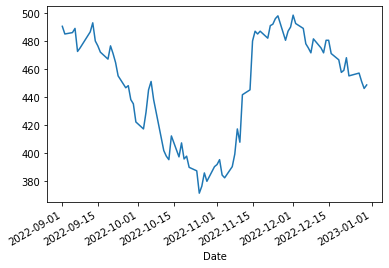

In [109]:
TSMC['2022-09':'2022-12']['Close'].plot()

### 合併資料

In [119]:
HONHAI = yf.download('2317.tw')

[*********************100%***********************]  1 of 1 completed


In [122]:
STOCKS = pd.DataFrame()

In [123]:
STOCKS['TSMC'] = TSMC['Close']

In [124]:
STOCKS['HONHAI'] = TSMC['Close']

In [125]:
STOCKS['TSMC'] = TSMC['Close']/TSMC['Close'].tail(100)[0]
STOCKS['HONHAI'] = HONHAI['Close']/HONHAI['Close'].tail(100)[0]

<AxesSubplot:xlabel='Date'>

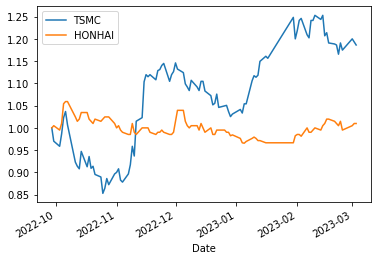

In [126]:
STOCKS.tail(100).plot()

### 關於回測

In [127]:
!pip install backtesting

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 KB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for backtesting: filename=Backtesting-0.3.3-py3-none-any.whl size=173819 sha256=a96d242b5b26b72af9b8ded43b4343e1487ea90a77cf00f4bc4ad72299cae188
  Stored in directory: /root/.cache/pip/wheels/cd/5c/f7/aafe95c37f8b07f838fb0a8cb3177de23a38c09cbd10b447b8
Successfully built backtesting


In [128]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover

from backtesting.test import SMA

class SmaCross(Strategy):
    def init(self):
        price = self.data.Close
        self.ma1 = self.I(SMA, price, 10)
        self.ma2 = self.I(SMA, price, 20)

    def next(self):
        if crossover(self.ma1, self.ma2):
            self.buy()
        elif crossover(self.ma2, self.ma1):
            self.sell()

/usr/local/lib/python3.8/dist-packages/backtesting/_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


In [129]:
bt = Backtest(TSMC, SmaCross, commission=.002, exclusive_orders=True)
stats = bt.run()
bt.plot()

Row(id='1449', ...)

In [130]:
stats

Start                     2000-01-04 00:00:00
End                       2023-03-03 00:00:00
Duration                   8459 days 00:00:00
Exposure Time [%]                   95.985465
Equity Final [$]                   571.733215
Equity Peak [$]                  10831.514551
Return [%]                         -94.282668
Buy & Hold Return [%]              640.857383
Return (Ann.) [%]                  -11.731453
Volatility (Ann.) [%]               25.917372
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -96.970652
Avg. Drawdown [%]                  -33.891518
Max. Drawdown Duration     8390 days 00:00:00
Avg. Drawdown Duration     2802 days 00:00:00
# Trades                                  309
Win Rate [%]                        37.864078
Best Trade [%]                      43.677679
Worst Trade [%]                    -24.618985
Avg. Trade [%]                    

## 問題解答

關於 00878 定期定額報酬率評估

In [131]:
HDY = yf.download('00878.tw')

[*********************100%***********************]  1 of 1 completed


In [132]:
HDY.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-10,15.00,15.00,15.00,15.00,15.00,0
2020-07-13,14.99,14.99,14.99,14.99,14.99,0
2020-07-14,14.98,14.98,14.98,14.98,14.98,0
2020-07-15,14.96,14.96,14.96,14.96,14.96,0
2020-07-16,14.97,14.97,14.97,14.97,14.97,0


<AxesSubplot:xlabel='Date'>

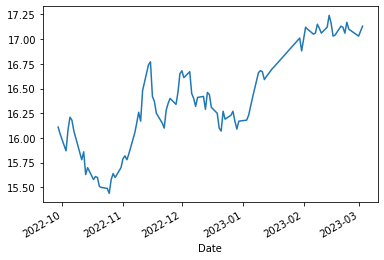

In [133]:
HDY['Close'].tail(100).plot()

In [134]:
# 假設每一次買五萬元
CASH = 50000

In [135]:
# 假設定期定額的時限是2022年一整年
for i in range(12):
  print(f"2022-{i+1:02}")

2022-01
2022-02
2022-03
2022-04
2022-05
2022-06
2022-07
2022-08
2022-09
2022-10
2022-11
2022-12


In [136]:
# 總共花的錢
TOTALCASH = CASH*12

In [137]:
# 總共買的股數
TOTALSTOCK = 0
for i in range(12):
  d = f"2022-{i+1:02}"
  TOTALSTOCK += CASH/HDY[d]['Close'][0]

<ipython-input-137-0720c468b00f>:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  TOTALSTOCK += CASH/HDY[d]['Close'][0]


In [138]:
TOTALSTOCK

34131.46725166368

In [139]:
# 2022年底結算總價值/花費的金額
TOTALSTOCK*HDY['2022']['Close'][-1]/TOTALCASH

<ipython-input-139-7bdcfae830d5>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  TOTALSTOCK*HDY['2022']['Close'][-1]/TOTALCASH


0.9198430467723766

<ipython-input-140-60beca37971f>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  HDY['2022']['Close'].plot()


<AxesSubplot:xlabel='Date'>

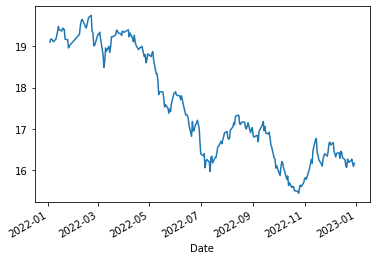

In [140]:
HDY['2022']['Close'].plot()

### 如果不是定期定額，報酬率會是？

In [142]:
LUMPSUM = TOTALCASH/HDY['2022']['Close'][0]

<ipython-input-142-eebd0891e058>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  LUMPSUM = TOTALCASH/HDY['2022']['Close'][0]


In [143]:
LUMPSUM*HDY['2022']['Close'][-1]/TOTALCASH

<ipython-input-143-189f16cf25ec>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  LUMPSUM*HDY['2022']['Close'][-1]/TOTALCASH


0.846596845724758

## 刪除欄、列

In [147]:
df

,國文,英文,數學,理化,總分,平均,名次,加權平均
郭雅惠,58,52,48,82,240,60.00,6.0,60.4
陳欣虹,88,50,37,76,251,62.75,4.5,57.7
王曉明,60,63,86,42,251,62.75,4.5,63.3
李四,70,37,69,83,259,64.75,3.0,63.7
陳恭,74,98,78,92,342,85.50,1.0,87.8
小孩子,35,67,70,44,216,54.00,8.5,57.8
孩子王,91,63,75,48,277,69.25,2.0,64.9
張先生,40,32,35,42,149,37.25,10.0,36.7
張大名,33,60,37,89,219,54.75,7.0,59.1
張哈哈,75,48,57,36,216,54.00,8.5,49.8


In [148]:
df1 = df.drop('李四')

In [149]:
df1

,國文,英文,數學,理化,總分,平均,名次,加權平均
郭雅惠,58,52,48,82,240,60.00,6.0,60.4
陳欣虹,88,50,37,76,251,62.75,4.5,57.7
王曉明,60,63,86,42,251,62.75,4.5,63.3
陳恭,74,98,78,92,342,85.50,1.0,87.8
小孩子,35,67,70,44,216,54.00,8.5,57.8
孩子王,91,63,75,48,277,69.25,2.0,64.9
張先生,40,32,35,42,149,37.25,10.0,36.7
張大名,33,60,37,89,219,54.75,7.0,59.1
張哈哈,75,48,57,36,216,54.00,8.5,49.8


In [150]:
df1.drop('陳恭',inplace=True)

In [151]:
df1

,國文,英文,數學,理化,總分,平均,名次,加權平均
郭雅惠,58,52,48,82,240,60.00,6.0,60.4
陳欣虹,88,50,37,76,251,62.75,4.5,57.7
王曉明,60,63,86,42,251,62.75,4.5,63.3
小孩子,35,67,70,44,216,54.00,8.5,57.8
孩子王,91,63,75,48,277,69.25,2.0,64.9
張先生,40,32,35,42,149,37.25,10.0,36.7
張大名,33,60,37,89,219,54.75,7.0,59.1
張哈哈,75,48,57,36,216,54.00,8.5,49.8


In [152]:
df1.drop('加權平均', axis=1)

,國文,英文,數學,理化,總分,平均,名次
郭雅惠,58,52,48,82,240,60.00,6.0
陳欣虹,88,50,37,76,251,62.75,4.5
王曉明,60,63,86,42,251,62.75,4.5
小孩子,35,67,70,44,216,54.00,8.5
孩子王,91,63,75,48,277,69.25,2.0
張先生,40,32,35,42,149,37.25,10.0
張大名,33,60,37,89,219,54.75,7.0
張哈哈,75,48,57,36,216,54.00,8.5


In [153]:
df1

,國文,英文,數學,理化,總分,平均,名次,加權平均
郭雅惠,58,52,48,82,240,60.00,6.0,60.4
陳欣虹,88,50,37,76,251,62.75,4.5,57.7
王曉明,60,63,86,42,251,62.75,4.5,63.3
小孩子,35,67,70,44,216,54.00,8.5,57.8
孩子王,91,63,75,48,277,69.25,2.0,64.9
張先生,40,32,35,42,149,37.25,10.0,36.7
張大名,33,60,37,89,219,54.75,7.0,59.1
張哈哈,75,48,57,36,216,54.00,8.5,49.8


In [154]:
df1.drop('加權平均', axis=1, inplace=True)

In [155]:
df1

,國文,英文,數學,理化,總分,平均,名次
郭雅惠,58,52,48,82,240,60.00,6.0
陳欣虹,88,50,37,76,251,62.75,4.5
王曉明,60,63,86,42,251,62.75,4.5
小孩子,35,67,70,44,216,54.00,8.5
孩子王,91,63,75,48,277,69.25,2.0
張先生,40,32,35,42,149,37.25,10.0
張大名,33,60,37,89,219,54.75,7.0
張哈哈,75,48,57,36,216,54.00,8.5


## 缺失值處理

In [156]:
df

,國文,英文,數學,理化,總分,平均,名次,加權平均
郭雅惠,58,52,48,82,240,60.00,6.0,60.4
陳欣虹,88,50,37,76,251,62.75,4.5,57.7
王曉明,60,63,86,42,251,62.75,4.5,63.3
李四,70,37,69,83,259,64.75,3.0,63.7
陳恭,74,98,78,92,342,85.50,1.0,87.8
小孩子,35,67,70,44,216,54.00,8.5,57.8
孩子王,91,63,75,48,277,69.25,2.0,64.9
張先生,40,32,35,42,149,37.25,10.0,36.7
張大名,33,60,37,89,219,54.75,7.0,59.1
張哈哈,75,48,57,36,216,54.00,8.5,49.8


In [157]:
df.drop('加權平均',axis=1,inplace=True)

In [ ]:
df.drop(['名次','總分'],axis=1,inplace=True)

In [175]:
#df.sort_values(['國文','英文'],ascending=[False,True])
df.drop(['平均'],axis=1,inplace=True)

In [176]:
df

,國文,英文,數學,理化
郭雅惠,NaN,52.0,NaN,82
陳欣虹,88.0,NaN,37.0,76
王曉明,NaN,63.0,86.0,42
李四,NaN,37.0,NaN,83
陳恭,74.0,98.0,NaN,92
小孩子,35.0,67.0,70.0,44
孩子王,91.0,63.0,75.0,48
張先生,NaN,32.0,NaN,42
張大名,33.0,60.0,37.0,89
張哈哈,75.0,NaN,57.0,36


In [177]:
df.iloc[3:5,1:3]

,英文,數學
李四,37.0,NaN
陳恭,98.0,NaN


In [178]:
#隨機選四個位置填上np.nan
for i in range(4):
  m = random.randint(0,9)
  n = random.randint(0,3)
  df.iloc[m,n] = np.NAN

In [179]:
df

,國文,英文,數學,理化
郭雅惠,NaN,52.0,NaN,NaN
陳欣虹,88.0,NaN,37.0,76.0
王曉明,NaN,63.0,86.0,42.0
李四,NaN,37.0,NaN,83.0
陳恭,74.0,98.0,NaN,92.0
小孩子,35.0,67.0,70.0,44.0
孩子王,91.0,NaN,75.0,48.0
張先生,NaN,32.0,NaN,42.0
張大名,NaN,60.0,37.0,89.0
張哈哈,75.0,NaN,57.0,36.0


In [180]:
df.dropna()

,國文,英文,數學,理化
小孩子,35.0,67.0,70.0,44.0


In [181]:
df

,國文,英文,數學,理化
郭雅惠,NaN,52.0,NaN,NaN
陳欣虹,88.0,NaN,37.0,76.0
王曉明,NaN,63.0,86.0,42.0
李四,NaN,37.0,NaN,83.0
陳恭,74.0,98.0,NaN,92.0
小孩子,35.0,67.0,70.0,44.0
孩子王,91.0,NaN,75.0,48.0
張先生,NaN,32.0,NaN,42.0
張大名,NaN,60.0,37.0,89.0
張哈哈,75.0,NaN,57.0,36.0


In [182]:
#如果有出現全部都是缺失的狀況會直接刪除
df.dropna(how='all')

,國文,英文,數學,理化
郭雅惠,NaN,52.0,NaN,NaN
陳欣虹,88.0,NaN,37.0,76.0
王曉明,NaN,63.0,86.0,42.0
李四,NaN,37.0,NaN,83.0
陳恭,74.0,98.0,NaN,92.0
小孩子,35.0,67.0,70.0,44.0
孩子王,91.0,NaN,75.0,48.0
張先生,NaN,32.0,NaN,42.0
張大名,NaN,60.0,37.0,89.0
張哈哈,75.0,NaN,57.0,36.0


In [183]:
df.dropna(subset=['國文'])

,國文,英文,數學,理化
陳欣虹,88.0,NaN,37.0,76.0
陳恭,74.0,98.0,NaN,92.0
小孩子,35.0,67.0,70.0,44.0
孩子王,91.0,NaN,75.0,48.0
張哈哈,75.0,NaN,57.0,36.0


In [184]:
df.dropna(subset=['國文','英文'])

,國文,英文,數學,理化
陳恭,74.0,98.0,NaN,92.0
小孩子,35.0,67.0,70.0,44.0
